In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

## Load the Dataset

In [2]:
df = pd.read_csv('UTSClustering.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## EDA

### Basic Data Information

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.describe(include = 'object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### Handling the Missing Values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.duplicated().sum()

5268

In [9]:
# Drop the columns that are not needed
df = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate'], errors='ignore')  # Use errors='ignore' to avoid errors if the column doesn't exist

# Drop the missing values
df = df.dropna(inplace=False)  # Use inplace=False to avoid overwriting the NoneType df

# Drop duplicates
df = df.drop_duplicates(inplace=False)  # Use inplace=False to avoid overwriting the NoneType df

# Check the result
df.isnull().sum()

Quantity      0
UnitPrice     0
CustomerID    0
Country       0
dtype: int64

In [10]:
df.duplicated().sum()

0

### Removing negative values in the columns

In [88]:
# Remove rows with negative values in Quantity and UnitPrice columns
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]

# Check the result
df.describe()

,Quantity,UnitPrice,CustomerID
count,123536.000000,123536.000000,123536.000000
mean,7.877777,2.492492,15354.269444
std,6.822612,1.880346,1692.891205
min,1.000000,0.000000,12347.000000
25%,2.000000,0.950000,13975.000000
50%,6.000000,1.950000,15376.000000
75%,12.000000,3.750000,16823.000000
max,27.000000,8.000000,18287.000000


### Grouping numerical values & categorical values

In [89]:
numerical = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=['object'])

print("Numerical columns:")
print(numerical.columns.tolist())
print("\nCategorical columns:")
print(categorical.columns.tolist())

Numerical columns:
['Quantity', 'UnitPrice', 'CustomerID']

Categorical columns:
['Country']


### Data Distribution for Numerical Values

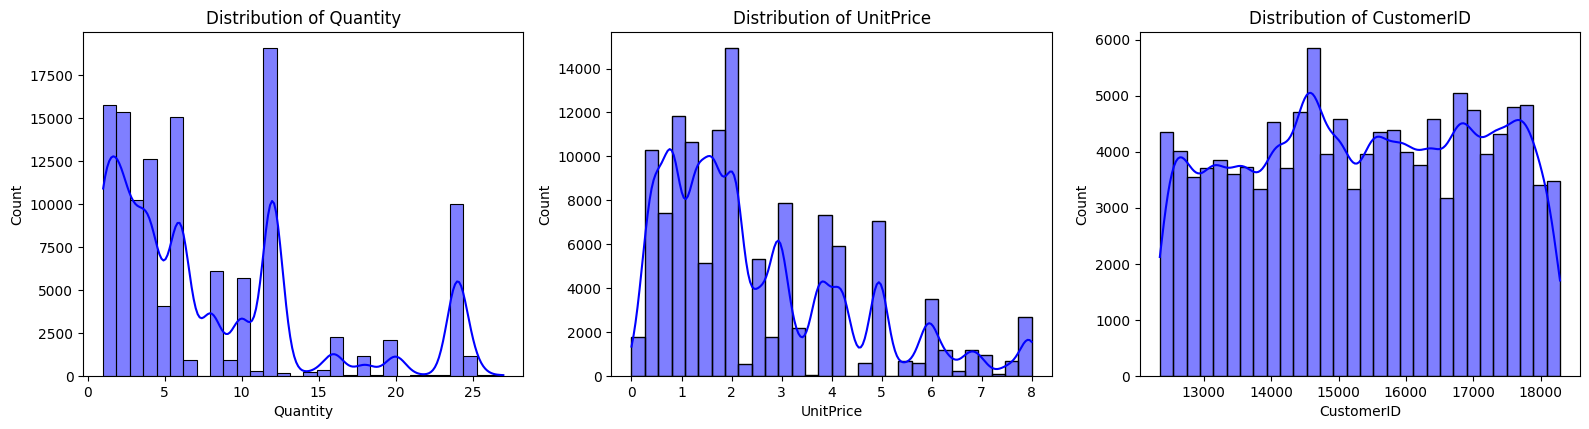

In [90]:
# Visualisasi Distribusi Kolom Numerik
plt.figure(figsize=(16, 12))

# Membuat histogram dan KDE untuk setiap kolom numerik
for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  # Menampilkan 3x3 plot untuk setiap kolom numerik
    sns.histplot(numerical[column], kde=True, bins=30, color='blue')  # Menggunakan histplot untuk histogram + KDE
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

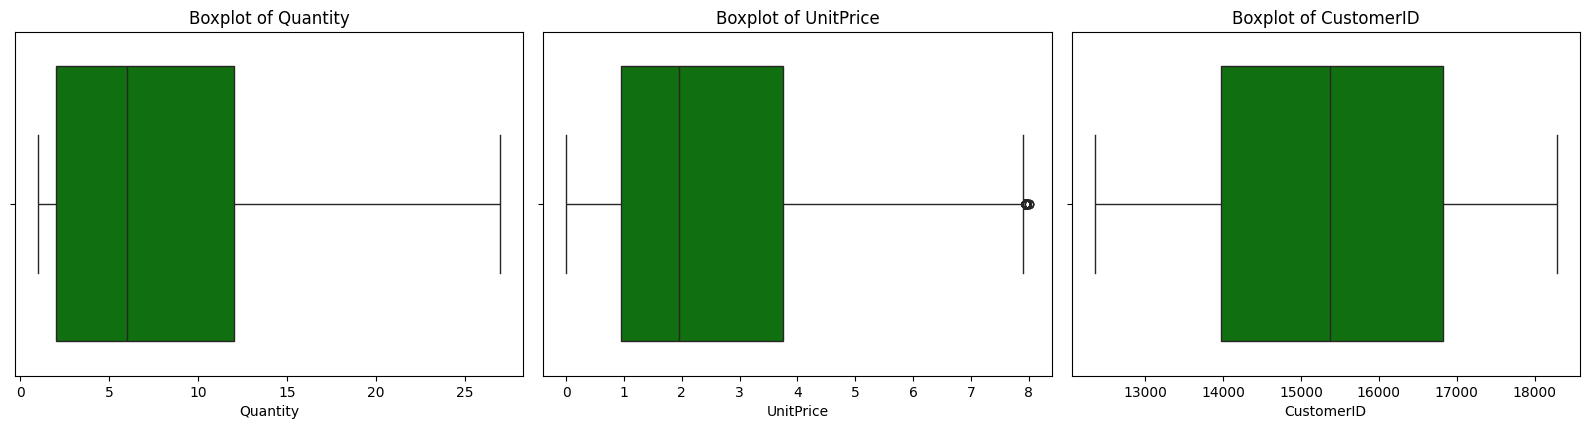

In [91]:
# Visualisasi Boxplot untuk kolom numerik
plt.figure(figsize=(16, 12))

# Membuat boxplot untuk setiap kolom numerik
for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  # Menampilkan 3x3 plot untuk setiap kolom numerik
    sns.boxplot(x=numerical[column], color='green')  # Membuat boxplot
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()


In [92]:
# Handle outliers using IQR method
for column in numerical.columns:
    Q1 = numerical[column].quantile(0.25)
    Q3 = numerical[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Check the result
df.describe()

,Quantity,UnitPrice,CustomerID
count,121028.000000,121028.000000,121028.000000
mean,7.985755,2.379398,15354.996588
std,6.845857,1.725965,1692.633674
min,1.000000,0.000000,12347.000000
25%,3.000000,0.950000,13975.000000
50%,6.000000,1.950000,15379.000000
75%,12.000000,3.390000,16820.000000
max,27.000000,7.900000,18287.000000


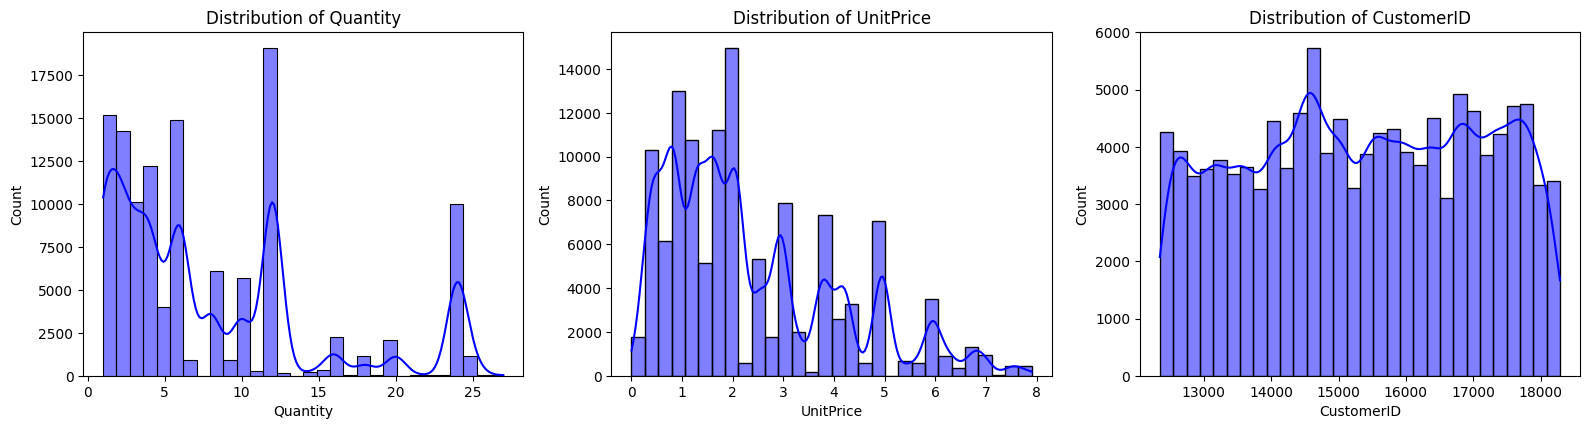

Skewness of numerical columns:
Quantity      1.150196
UnitPrice     0.949949
CustomerID   -0.044587
dtype: float64

Outliers remaining after handling using IQR method:
{'Quantity': 75, 'UnitPrice': 1033, 'CustomerID': 0}


In [93]:
from scipy.stats import skew

# Visualisasi Histogram dan KDE setelah menangani outliers
plt.figure(figsize=(16, 12))

# Membuat histogram dan KDE untuk setiap kolom numerik
for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  # Menampilkan 3x3 plot untuk setiap kolom numerik
    sns.histplot(df[column], kde=True, bins=30, color='blue')  # Histogram + KDE
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

# Menghitung dan menampilkan nilai skewness untuk setiap kolom numerik
skew_values = df[numerical.columns].apply(lambda x: skew(x.dropna()))
print("Skewness of numerical columns:")
print(skew_values)

# Memeriksa apakah masih ada outlier setelah penanganan IQR
outliers_after = {}
for column in numerical.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

print("\nOutliers remaining after handling using IQR method:")
print(outliers_after)


### Label Encoding for Categorical Column

In [94]:
# One-hot encoding for 'Country' column
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

### Feature Selection

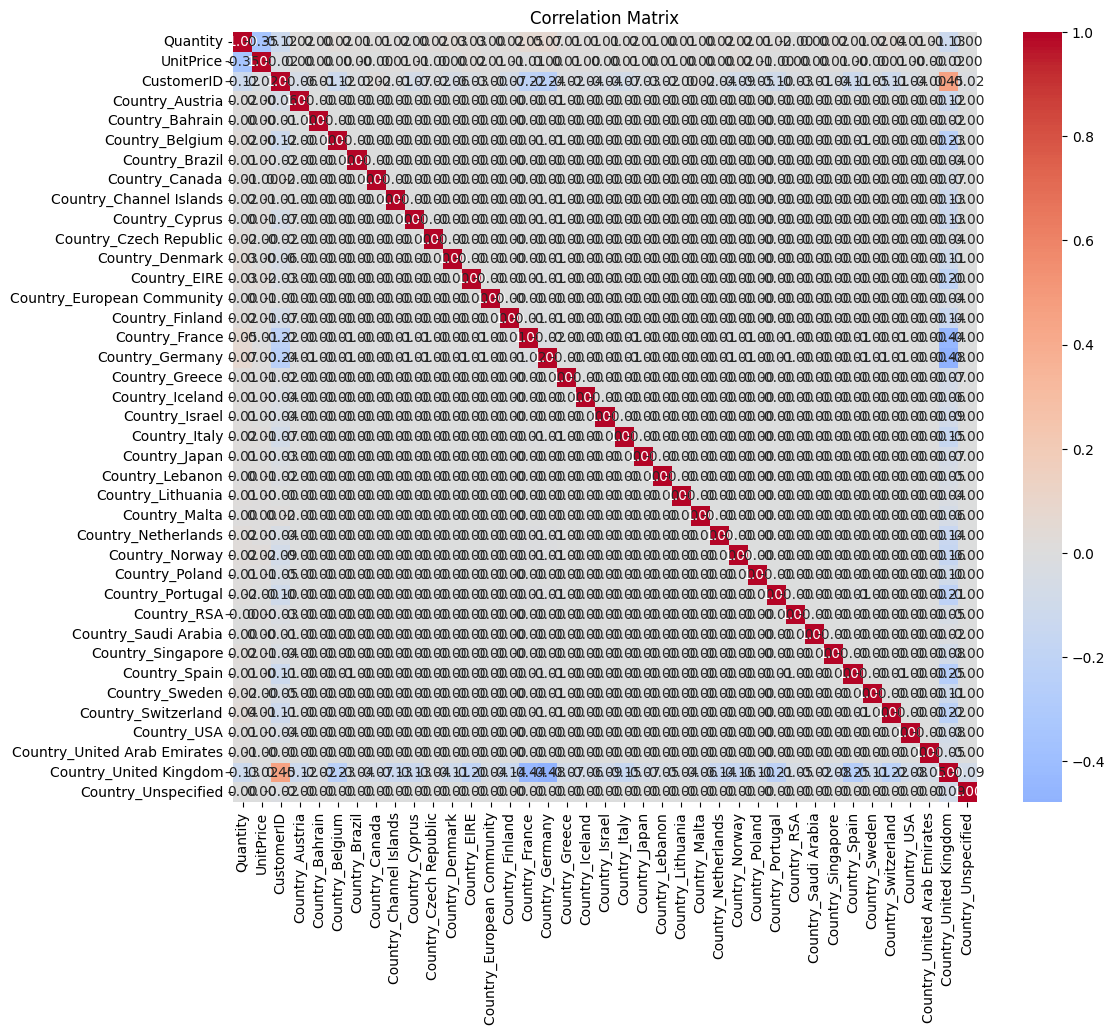

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Feature Scaling (Standardization)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# Feature Selection (Removing constant and quasi-constant features)
selector = VarianceThreshold(threshold=0.01)  # Remove features with variance <= 1%
features_selected = selector.fit_transform(features_scaled)

# Visualizing Correlation Matrix
corr_matrix = pd.DataFrame(features_scaled, columns=df.columns).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

## Build Models

### K-Means Clustering

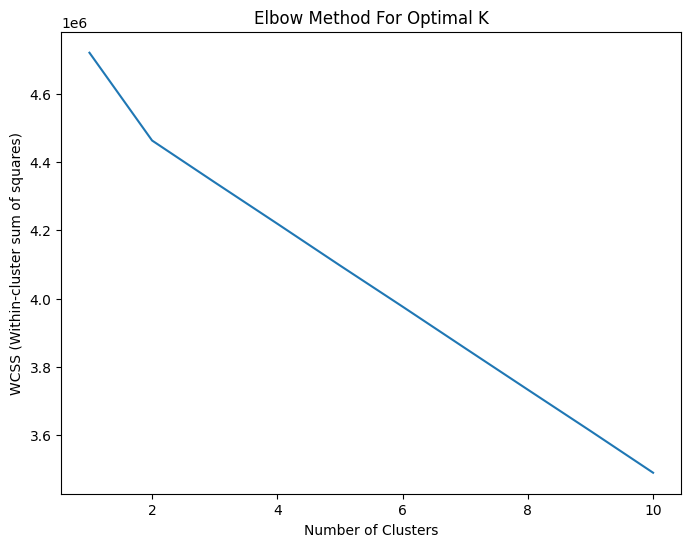

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Menentukan jumlah klaster menggunakan Elbow Method
wcss = []  # List to store within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_selected)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method untuk menentukan jumlah klaster optimal
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

In [103]:
# Berdasarkan plot, kita tentukan k optimal, misalnya 4
optimal_k = 2  # Tentukan k berdasarkan grafik elbow

# Melakukan KMeans clustering dengan k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_selected)

# Menilai kualitas clustering dengan Silhouette Score
# Evaluasi Clustering
silhouette_avg = silhouette_score(features_selected, clusters)
davies_bouldin_avg = davies_bouldin_score(features_selected, clusters)
calinski_harabasz_avg = calinski_harabasz_score(features_selected, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")

Silhouette Score: 0.7602702219489738
Davies-Bouldin Index: 3.193808566274304
Calinski-Harabasz Score: 6974.169770388119


### Gaussian Mixture

Silhouette Score for Gaussian Mixture Model: 0.6876292277357821


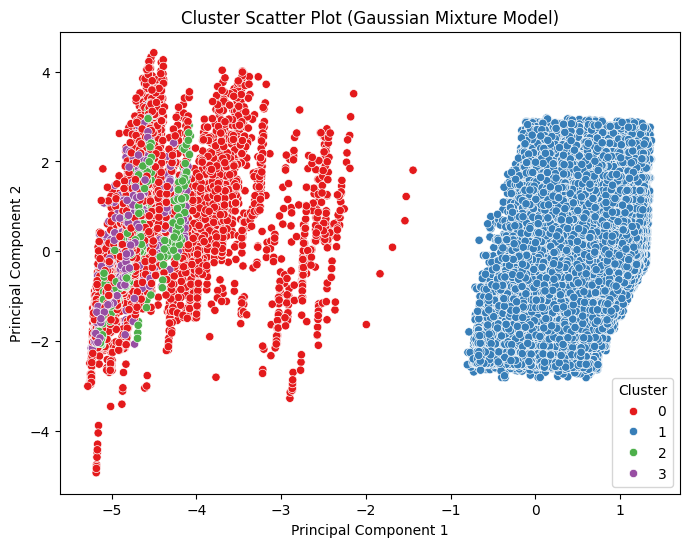

BIC: -47672063.07465864
AIC: -47703881.76010651


In [110]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Menentukan jumlah komponen untuk GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(features_selected)

# Evaluasi Clustering dengan Silhouette Score
silhouette_avg_gmm = silhouette_score(features_selected, gmm_clusters)
print(f"Silhouette Score for Gaussian Mixture Model: {silhouette_avg_gmm}")

# Visualisasi Cluster Scatter Plot menggunakan PCA untuk melihat distribusi klaster
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_selected)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=gmm_clusters, palette="Set1")
plt.title("Cluster Scatter Plot (Gaussian Mixture Model)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Evaluasi Model dengan BIC dan AIC untuk menentukan jumlah komponen yang optimal
bic = gmm.bic(features_selected)
aic = gmm.aic(features_selected)

print(f"BIC: {bic}")
print(f"AIC: {aic}")

### DBSCAN

Silhouette Score for DBSCAN: 0.46409578875762403


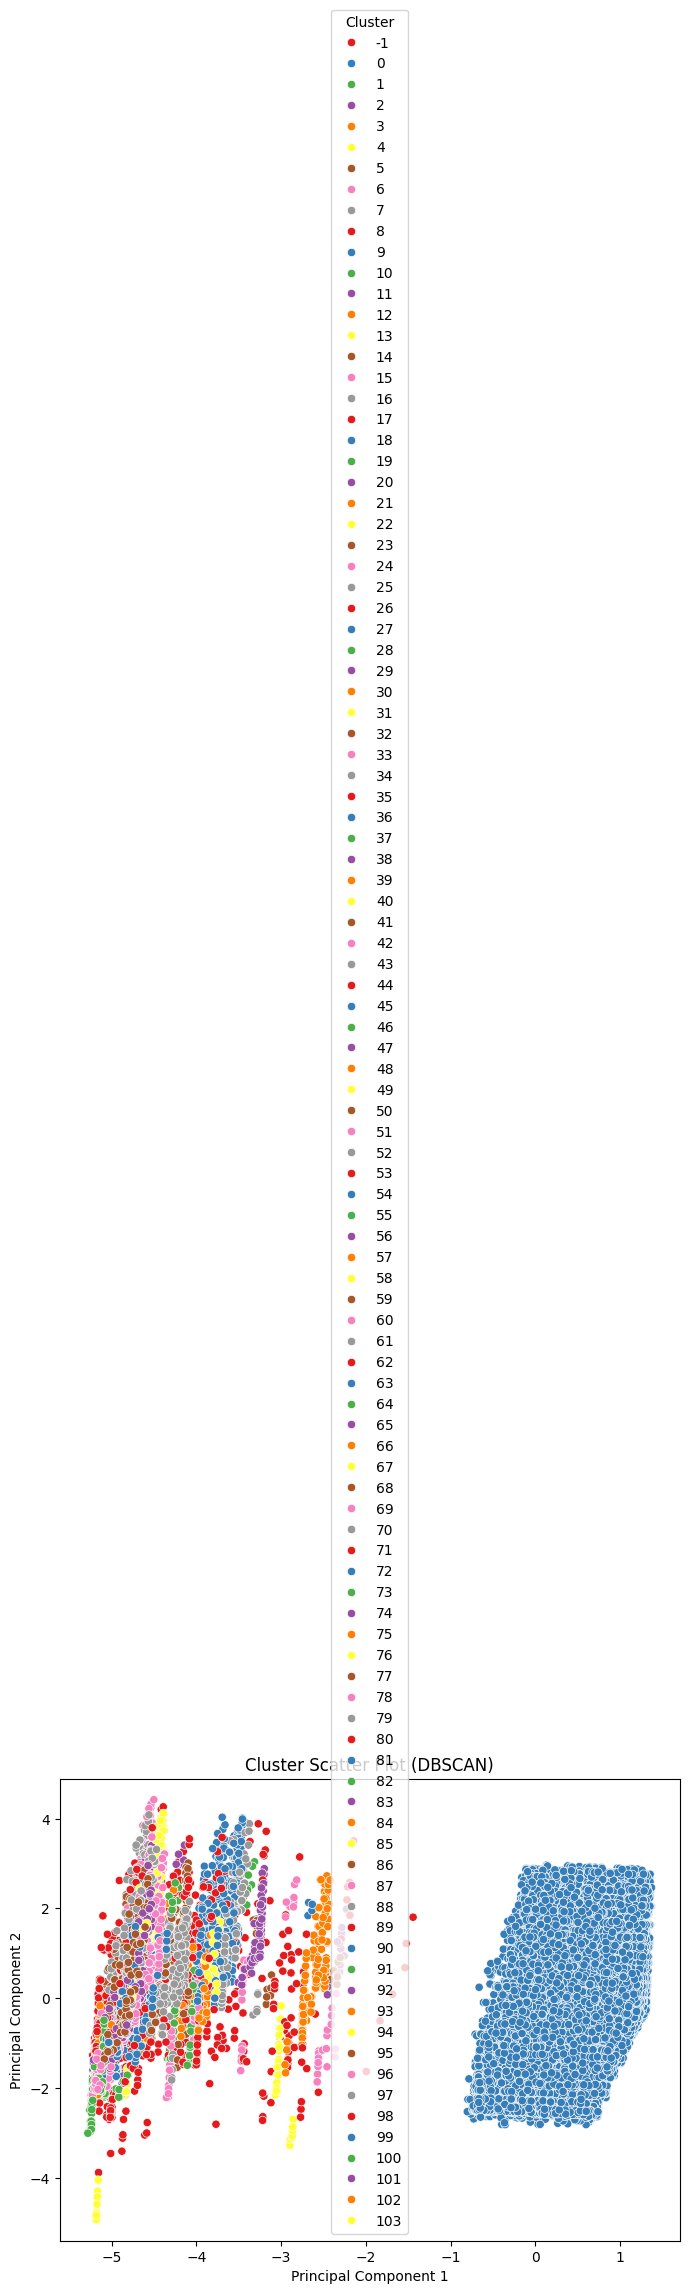

Number of noise points (outliers): 469


In [112]:
from sklearn.cluster import DBSCAN

# Model DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: radius untuk mencari tetangga, min_samples: minimum jumlah titik untuk membentuk klaster
dbscan_clusters = dbscan.fit_predict(features_selected)

# Evaluasi Clustering dengan Silhouette Score
# Untuk DBSCAN, kita hanya menghitung Silhouette Score untuk titik yang bukan noise (titik yang memiliki label != -1)
silhouette_avg_dbscan = silhouette_score(features_selected, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else -1
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")

# Visualisasi Cluster Scatter Plot menggunakan PCA untuk melihat distribusi klaster
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_selected)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=dbscan_clusters, palette="Set1", marker='o')
plt.title("Cluster Scatter Plot (DBSCAN)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Menyaring titik-titik yang dianggap sebagai noise (label -1)
noise_points = sum(dbscan_clusters == -1)
print(f"Number of noise points (outliers): {noise_points}")

### Spectral Clustering

c:\Users\Chandra Aulia H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for Spectral Clustering: 0.4275443837360123


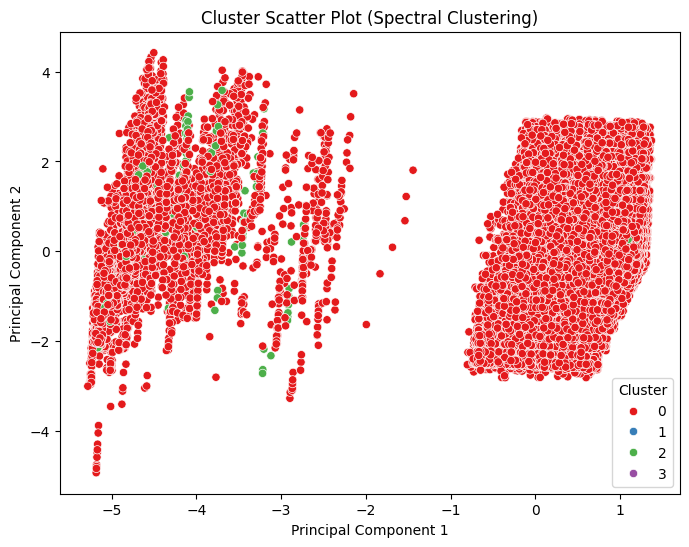

In [113]:
from sklearn.cluster import SpectralClustering

# Model Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral.fit_predict(features_selected)

# Evaluasi Clustering dengan Silhouette Score
silhouette_avg_spectral = silhouette_score(features_selected, spectral_clusters)
print(f"Silhouette Score for Spectral Clustering: {silhouette_avg_spectral}")

# Visualisasi Cluster Scatter Plot menggunakan PCA untuk melihat distribusi klaster
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_selected)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=spectral_clusters, palette="Set1", marker='o')
plt.title("Cluster Scatter Plot (Spectral Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()